# GPU 0 (RTX 2080 Ti)

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/serving'

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [14]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from timeit import timeit

from model import XiheNet
from evaluation.utils import SphericalHarmonics
from datasets.xihe.loader import XiheTestDataset

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)

In [23]:
def get_scripted_model(n_points):
    model = XiheNet(hparams={
        'n_shc': 27,
        'n_points': n_points,
        'min': torch.zeros((27)),
        'scale': torch.ones((27))
    })
    _ = model.eval().cuda()
    scripted_model = torch.jit.script(model)
    
    x_xyz = torch.zeros((1, 3, n_points)).cuda()
    x_rgb = torch.zeros((1, 3, n_points)).cuda()
    
    return x_xyz, x_rgb, scripted_model

In [40]:
x_xyz, x_rgb, m = get_scripted_model(512)
%timeit m.forward(x_xyz, x_rgb)

3.99 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
x_xyz, x_rgb, m = get_scripted_model(768)
%timeit m.forward(x_xyz, x_rgb)

4.04 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
x_xyz, x_rgb, m = get_scripted_model(1024)
%timeit m.forward(x_xyz, x_rgb)

4.41 ms ± 40.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
x_xyz, x_rgb, m = get_scripted_model(1280)
%timeit m.forward(x_xyz, x_rgb)

5.91 ms ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
x_xyz, x_rgb, m = get_scripted_model(1536)
%timeit m.forward(x_xyz, x_rgb)

7.38 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
x_xyz, x_rgb, m = get_scripted_model(1792)
%timeit m.forward(x_xyz, x_rgb)

9.04 ms ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
x_xyz, x_rgb, m = get_scripted_model(2048)
%timeit m.forward(x_xyz, x_rgb)

10.8 ms ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# GPU 2 (RTX 3090)

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [2]:
import torch
import pandas as pd
from tqdm import tqdm
from timeit import timeit

from model import XiheNet
from evaluation.utils import SphericalHarmonics
from datasets.xihe.loader import XiheTestDataset

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)

In [3]:
def get_scripted_model(n_points):
    model = XiheNet(hparams={
        'n_shc': 27,
        'n_points': n_points,
        'min': torch.zeros((27)),
        'scale': torch.ones((27))
    })
    _ = model.eval().cuda()
    scripted_model = torch.jit.script(model)
    
    x_xyz = torch.zeros((1, 3, n_points)).cuda()
    x_rgb = torch.zeros((1, 3, n_points)).cuda()
    
    return x_xyz, x_rgb, scripted_model

In [12]:
x_xyz, x_rgb, m = get_scripted_model(512)
%timeit m.forward(x_xyz, x_rgb)

3.2 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
x_xyz, x_rgb, m = get_scripted_model(768)
%timeit m.forward(x_xyz, x_rgb)

3.25 ms ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
x_xyz, x_rgb, m = get_scripted_model(1024)
%timeit m.forward(x_xyz, x_rgb)

3.33 ms ± 61.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
x_xyz, x_rgb, m = get_scripted_model(1280)
%timeit m.forward(x_xyz, x_rgb)

4.42 ms ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
x_xyz, x_rgb, m = get_scripted_model(1536)
%timeit m.forward(x_xyz, x_rgb)

5.67 ms ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
x_xyz, x_rgb, m = get_scripted_model(1792)
%timeit m.forward(x_xyz, x_rgb)

7.06 ms ± 4.68 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
x_xyz, x_rgb, m = get_scripted_model(2048)
%timeit m.forward(x_xyz, x_rgb)

8.52 ms ± 2.48 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Plot

In [3]:
df = pd.DataFrame(columns=['n_points', 'RTX 2080Ti Mean', 'RTX 2080Ti Std', 'RTX 3090 Mean', 'RTX 3090 Std'])
df.loc[len(df)] = ['512', 3.99, 129 / 1000, 3.2, 16.7]
df.loc[len(df)] = ['768', 4.04, 220 / 1000, 3.25, 26.2]
df.loc[len(df)] = ['1024', 4.41, 40.8 / 1000, 3.33, 61.4]
df.loc[len(df)] = ['1280', 5.91, 22.4 / 1000, 4.42, 1.36]
df.loc[len(df)] = ['1536', 7.38, 21.4 / 1000, 5.67, 1.56]
df.loc[len(df)] = ['1792', 9.04, 21.2 / 1000, 7.06, 4.68]
df.loc[len(df)] = ['2048', 10.8, 16.8/ 1000, 8.52, 2.48]

In [4]:
df

,n_points,RTX 2080Ti Mean,RTX 2080Ti Std,RTX 3090 Mean,RTX 3090 Std
0,512,3.99,0.1290,3.20,16.70
1,768,4.04,0.2200,3.25,26.20
2,1024,4.41,0.0408,3.33,61.40
3,1280,5.91,0.0224,4.42,1.36
4,1536,7.38,0.0214,5.67,1.56
5,1792,9.04,0.0212,7.06,4.68
6,2048,10.80,0.0168,8.52,2.48


In [5]:
df.to_csv(f'{WORKING_DIR}/logs/inference_time.csv')

In [9]:
df['Throughput'] = 1000 / df[['RTX 2080Ti Mean']]

In [10]:
df

,n_points,RTX 2080Ti Mean,RTX 2080Ti Std,RTX 3090 Mean,RTX 3090 Std,Throughput
0,512,3.99,0.1290,3.20,16.70,250.626566
1,768,4.04,0.2200,3.25,26.20,247.524752
2,1024,4.41,0.0408,3.33,61.40,226.757370
3,1280,5.91,0.0224,4.42,1.36,169.204738
4,1536,7.38,0.0214,5.67,1.56,135.501355
5,1792,9.04,0.0212,7.06,4.68,110.619469
6,2048,10.80,0.0168,8.52,2.48,92.592593


<ipython-input-18-1c7d805a5d87>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks().astype(int), size=14)


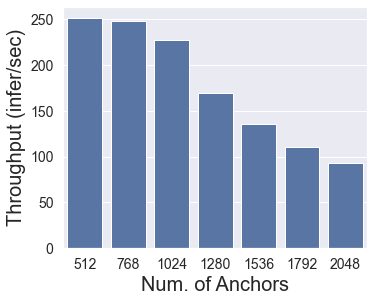

In [18]:
plt.figure(figsize=(5, 4))

ax = sns.barplot(data=df, x='n_points', y='Throughput', color='b')

ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('Throughput (infer/sec)', fontsize=20)

ax.set_xticklabels(ax.get_xticklabels(), size=14)
# ax.set_yticklabels(ax.get_yticklabels(), size=16)
ax.set_yticklabels(ax.get_yticks().astype(int), size=14)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/inference_throughput.pdf')